# Exploring EchoRegions Lines Object

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from pathlib import Path

In [2]:
import sys
sys.path.append('..')
import echoregions as er
pd.set_option("display.max_columns", None)

In [3]:
# Regions paths
evl_paths = Path('D:/Documents/Projects/echoregions/echoregions/test_data/ek60/lines')
# Data paths
raw_paths = Path('F:/data/hake/raw/SH1707')

evl_files = list(evl_paths.glob('*.evl'))
raw_files = list(raw_paths.glob('*.nc'))

## Read an EVL file

In [4]:
lines = er.read_evl(evl_files[0])

The data is stored as a Pandas DataFrame. This allows users to leverage Pandas' powerful DataFrame operations.

In [5]:
lines.data

,file_name,file_type,file_format_number,echoview_version,ping_time,depth,status
0,x1.bottom,EVBD,3,9.0.279.33861,2017-01-20 11:27:37.034,17.518239,3
1,x1.bottom,EVBD,3,9.0.279.33861,2017-01-20 11:27:38.044,16.886161,3
2,x1.bottom,EVBD,3,9.0.279.33861,2017-01-20 11:27:39.055,16.537958,3
3,x1.bottom,EVBD,3,9.0.279.33861,2017-01-20 11:27:40.068,17.494361,3
4,x1.bottom,EVBD,3,9.0.279.33861,2017-01-20 11:27:41.079,17.459570,3
...,...,...,...,...,...,...,...
13759,x1.bottom,EVBD,3,9.0.279.33861,2017-06-26 02:19:56.994,84.898303,3
13760,x1.bottom,EVBD,3,9.0.279.33861,2017-06-26 02:19:59.818,84.860518,3
13761,x1.bottom,EVBD,3,9.0.279.33861,2017-06-26 02:20:02.699,85.528454,3
13762,x1.bottom,EVBD,3,9.0.279.33861,2017-06-26 02:20:05.572,85.472250,3


## Save the DataFrame to File

In [6]:
# Save to JSON
lines.to_json()

In [7]:
# Save to CSV
lines.to_csv()

In [8]:
# Get a list of all exported files with `Lines.output_file`
lines.output_file

['D:\\Documents\\Projects\\echoregions\\echoregions\\test_data\\ek60\\lines\\x1.bottom.json',
 'D:\\Documents\\Projects\\echoregions\\echoregions\\test_data\\ek60\\lines\\x1.bottom.csv']

## Plotting

In [9]:
# The start and end times can be specified to limit how many points to plot as an alterantive to subselecting the data
start_date = "2017-06-25"
end_date = "2017-06-26"

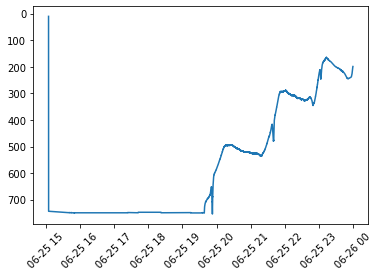

In [10]:
# Default lines plot
lines.plot(start_ping_time=start_date, end_ping_time=end_date)
plt.gca().invert_yaxis();
plt.xticks(rotation=45);

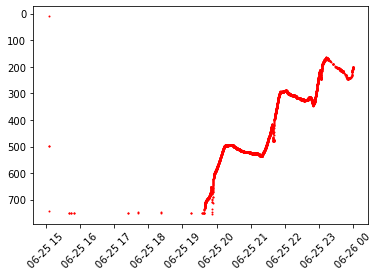

In [11]:
# Specify the format. 'ro' in this case for red dots
lines.plot('ro', start_ping_time=start_date, end_ping_time=end_date, markersize=1)
plt.gca().invert_yaxis();
plt.xticks(rotation=45);

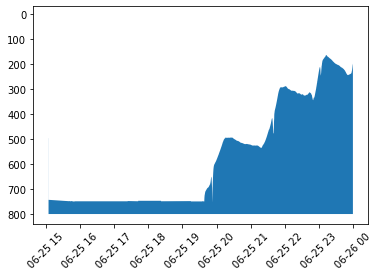

In [12]:
# Plot filled in between `max_depth` and the line
lines.plot(start_ping_time=start_date, end_ping_time=end_date, max_depth=800, fill_between=True)
plt.gca().invert_yaxis();
plt.xticks(rotation=45);